<a href="https://colab.research.google.com/github/On-JungWoan/PurchasePredict/blob/main/LOTTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. Library & Load DataSet**
----

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DEMO = pd.read_csv('/content/drive/MyDrive/Lotte/LPOINT_BIG_COMP_01_DEMO.csv')
PDDE = pd.read_csv('/content/drive/MyDrive/Lotte/LPOINT_BIG_COMP_02_PDDE.csv')
COP_U = pd.read_csv('/content/drive/MyDrive/Lotte/LPOINT_BIG_COMP_03_COP_U.csv')
PD_CLAC = pd.read_csv('/content/drive/MyDrive/Lotte/LPOINT_BIG_COMP_04_PD_CLAC.csv')
BR = pd.read_csv('/content/drive/MyDrive/Lotte/LPOINT_BIG_COMP_05_BR.csv')
LPAY = pd.read_csv('/content/drive/MyDrive/Lotte/LPOINT_BIG_COMP_06_LPAY.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **1. EDA**
----

### **1. 데이터 확인 및 전처리**

<br>

#### - **DEMO**

In [ ]:
print(DEMO.shape)
DEMO.head(1)

(29913, 4)


,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07


<br>

#### - **PDDE**

In [ ]:
print(PDDE.shape)
PDDE = PDDE[['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'de_dt', 'de_hr', 'pd_c', 'buy_ct', 'buy_am']]
PDDE.head(1)

(4381743, 10)


,cust,rct_no,chnl_dv,cop_c,br_c,de_dt,de_hr,pd_c,buy_ct,buy_am
0,M430112881,A01000001113,1,A01,A010039,20210101,10,PD0290,1,15000.0


In [ ]:
PDDE['de_dt'] = pd.to_datetime(PDDE.de_dt,format="%Y%m%d")
PDDE.head(1)

,cust,rct_no,chnl_dv,cop_c,br_c,de_dt,de_hr,pd_c,buy_ct,buy_am
0,M430112881,A01000001113,1,A01,A010039,2021-01-01,10,PD0290,1,15000.0


<br>

#### - **COP_U**

In [ ]:
print(COP_U.shape)
COP_U = COP_U[['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'de_dt', 'de_hr', 'vst_dt', 'buy_am']]
COP_U.head(1)

(248304, 9)


,cust,rct_no,chnl_dv,cop_c,br_c,de_dt,de_hr,vst_dt,buy_am
0,M839993508,21102612B015763935,1,B01,B010012,20211026,12,20211026,60000


In [ ]:
COP_U['de_dt'] = pd.to_datetime(COP_U.de_dt,format="%Y%m%d")
COP_U.head(1)

,cust,rct_no,chnl_dv,cop_c,br_c,de_dt,de_hr,vst_dt,buy_am
0,M839993508,21102612B015763935,1,B01,B010012,2021-10-26,12,20211026,60000


<br>
COP_U의 경우 rct_no에 de_dt가 중복값으로 들어가 있음<br>
PDDE와 COP_U 모두 br_c에 cop_c의 의미가 포함되어 있음<br>
<br>

<br>

#### - **PD_CLAC**

In [ ]:
print(PD_CLAC.shape)
PD_CLAC.head(1)

(1933, 4)


,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구


<br>
단순 pd_c에 대한 분류<br>
<br>

<br>

#### - **BR**

In [ ]:
print(BR.shape)
BR.head(1)

(8808, 4)


,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024


In [ ]:
BR.cop_c.unique()

array(['A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01',
       'D02', 'E01'], dtype=object)

<br>
단순 점포에 대한 분류<br>
br_c에 cop_c의 의미가 포함되어 있음<br>
<br>

<br>

#### - **LPAY**

In [ ]:
print(LPAY.shape)
LPAY = LPAY[['cust', 'rct_no', 'chnl_dv', 'cop_c', 'de_dt', 'de_hr', 'buy_am']]
LPAY.head(1)

(353184, 7)


,cust,rct_no,chnl_dv,cop_c,de_dt,de_hr,buy_am
0,M629656521,210803210311226,1,A03,20210803,21,10900


In [ ]:
LPAY['de_dt'] = pd.to_datetime(LPAY.de_dt,format="%Y%m%d")
LPAY.head(1)

,cust,rct_no,chnl_dv,cop_c,de_dt,de_hr,buy_am
0,M629656521,210803210311226,1,A03,2021-08-03,21,10900


<br>
L PAY 사용고객 데이터<br>
<br>

### **2. LPAY 사용 고객과 미사용 고객 비교**

#### - **NO_LPAY**

In [ ]:
NO_LPAY = pd.concat(
            [PDDE[['cust', 'rct_no', 'chnl_dv', 'cop_c', 'de_dt', 'de_hr','buy_am']],
            COP_U[['cust', 'rct_no', 'chnl_dv', 'cop_c', 'de_dt', 'de_hr','buy_am']]] )

In [ ]:
NO_LPAY.head()

,cust,rct_no,chnl_dv,cop_c,de_dt,de_hr,buy_am
0,M430112881,A01000001113,1,A01,2021-01-01,10,15000.0
1,M646853852,A01000002265,1,A01,2021-01-01,10,79700.0
2,M430112881,A01000003148,1,A01,2021-01-01,10,19000.0
3,M430112881,A01000003148,1,A01,2021-01-01,10,19000.0
4,M430112881,A01000004946,1,A01,2021-01-01,10,19000.0


<br>
전체 데이터 중 LPAY로 결제하지 않은 데이터만 추출하여 NO_LPAY에 저장<br>
<br>

In [ ]:
NO_LPAY.duplicated().sum()

428406

<br>
463만개의 데이터 중, 42만개의 중복행이 존재<br>
그러나 이는 일정 레벨 카테고리 단위로 상품을 분류했기 때문이다.<br>
실제로는 다른 상품이므로 중복행 제거는 하지 않는다.<br>
<br>

In [ ]:
set(NO_LPAY.rct_no) & set(LPAY.rct_no)

set()

<br>
NO_LPAY와 LPAY 간에 교집합은 없었다.<br>
<br>

<br>

#### - **시각화**

In [ ]:
def makeGraph(col):
  lpay_res = LPAY.groupby(col).mean()['buy_am']
  no_lpay_res = NO_LPAY.groupby(col).mean()['buy_am']

  plt.plot(lpay_res, label='LPAY')
  plt.plot(no_lpay_res, label='NO_LPAY')
  plt.legend()

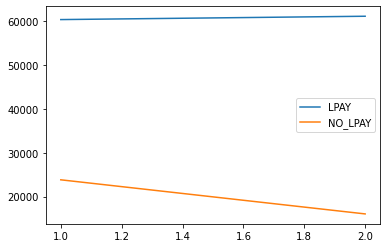

In [ ]:
makeGraph('chnl_dv')

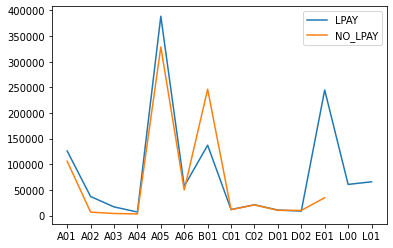

In [ ]:
makeGraph('cop_c')

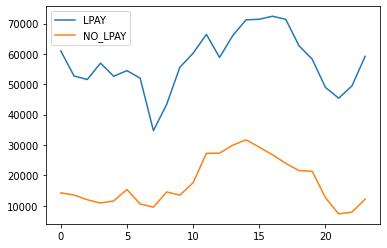

In [ ]:
makeGraph('de_hr')

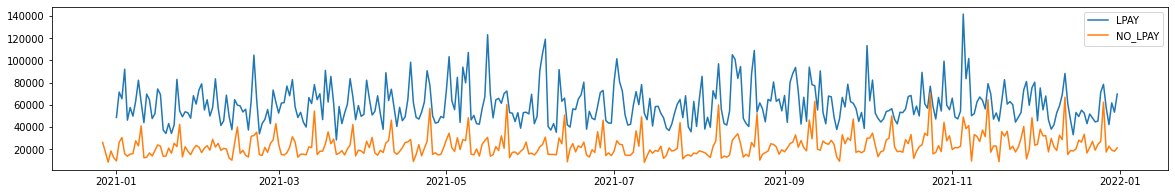

In [ ]:
plt.figure(figsize=(20,3))
makeGraph('de_dt')

<br>

#### - **주요 변수별 파생변수 생성**

chnl_dv, cop_c, de_hr, de_dt

In [ ]:
def makeColumns(columns):
  name = columns[0]
  lpay_res = LPAY[columns[0]].astype('str')
  no_lpay_res = NO_LPAY[columns[0]].astype('str')

  for i in range(len(columns)-1):
    name = name + '_' + columns[i+1]
    lpay_res = lpay_res + '_' + LPAY[columns[i+1]].astype('str')
    no_lpay_res = no_lpay_res + '_' + NO_LPAY[columns[i+1]].astype('str')

  LPAY[name] = lpay_res
  NO_LPAY[name] = no_lpay_res

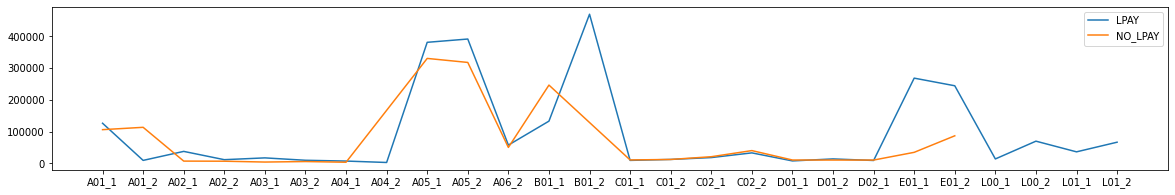

In [ ]:
makeColumns(['chnl_dv', 'cop_c'])

plt.figure(figsize=(20,3))
makeGraph('chnl_dv_cop_c')

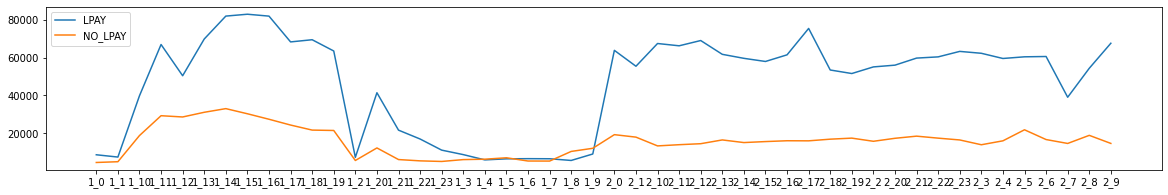

In [ ]:
makeColumns(['chnl_dv', 'de_hr'])

plt.figure(figsize=(20,3))
makeGraph('chnl_dv_de_hr')

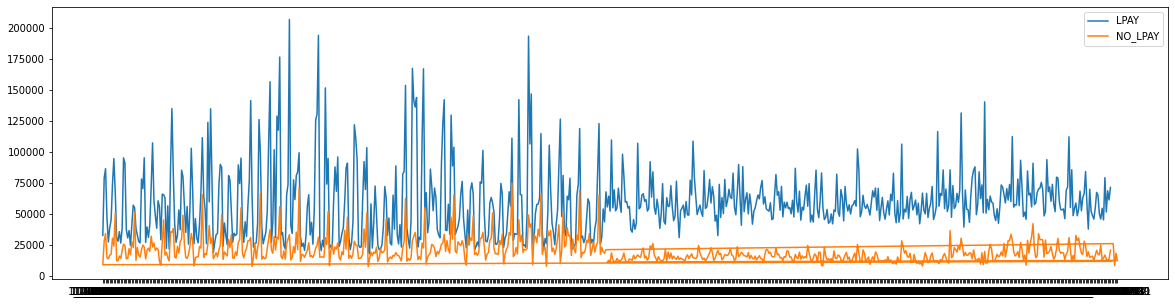

In [ ]:
makeColumns(['chnl_dv', 'de_dt'])

plt.figure(figsize=(20,5))
makeGraph('chnl_dv_de_dt')

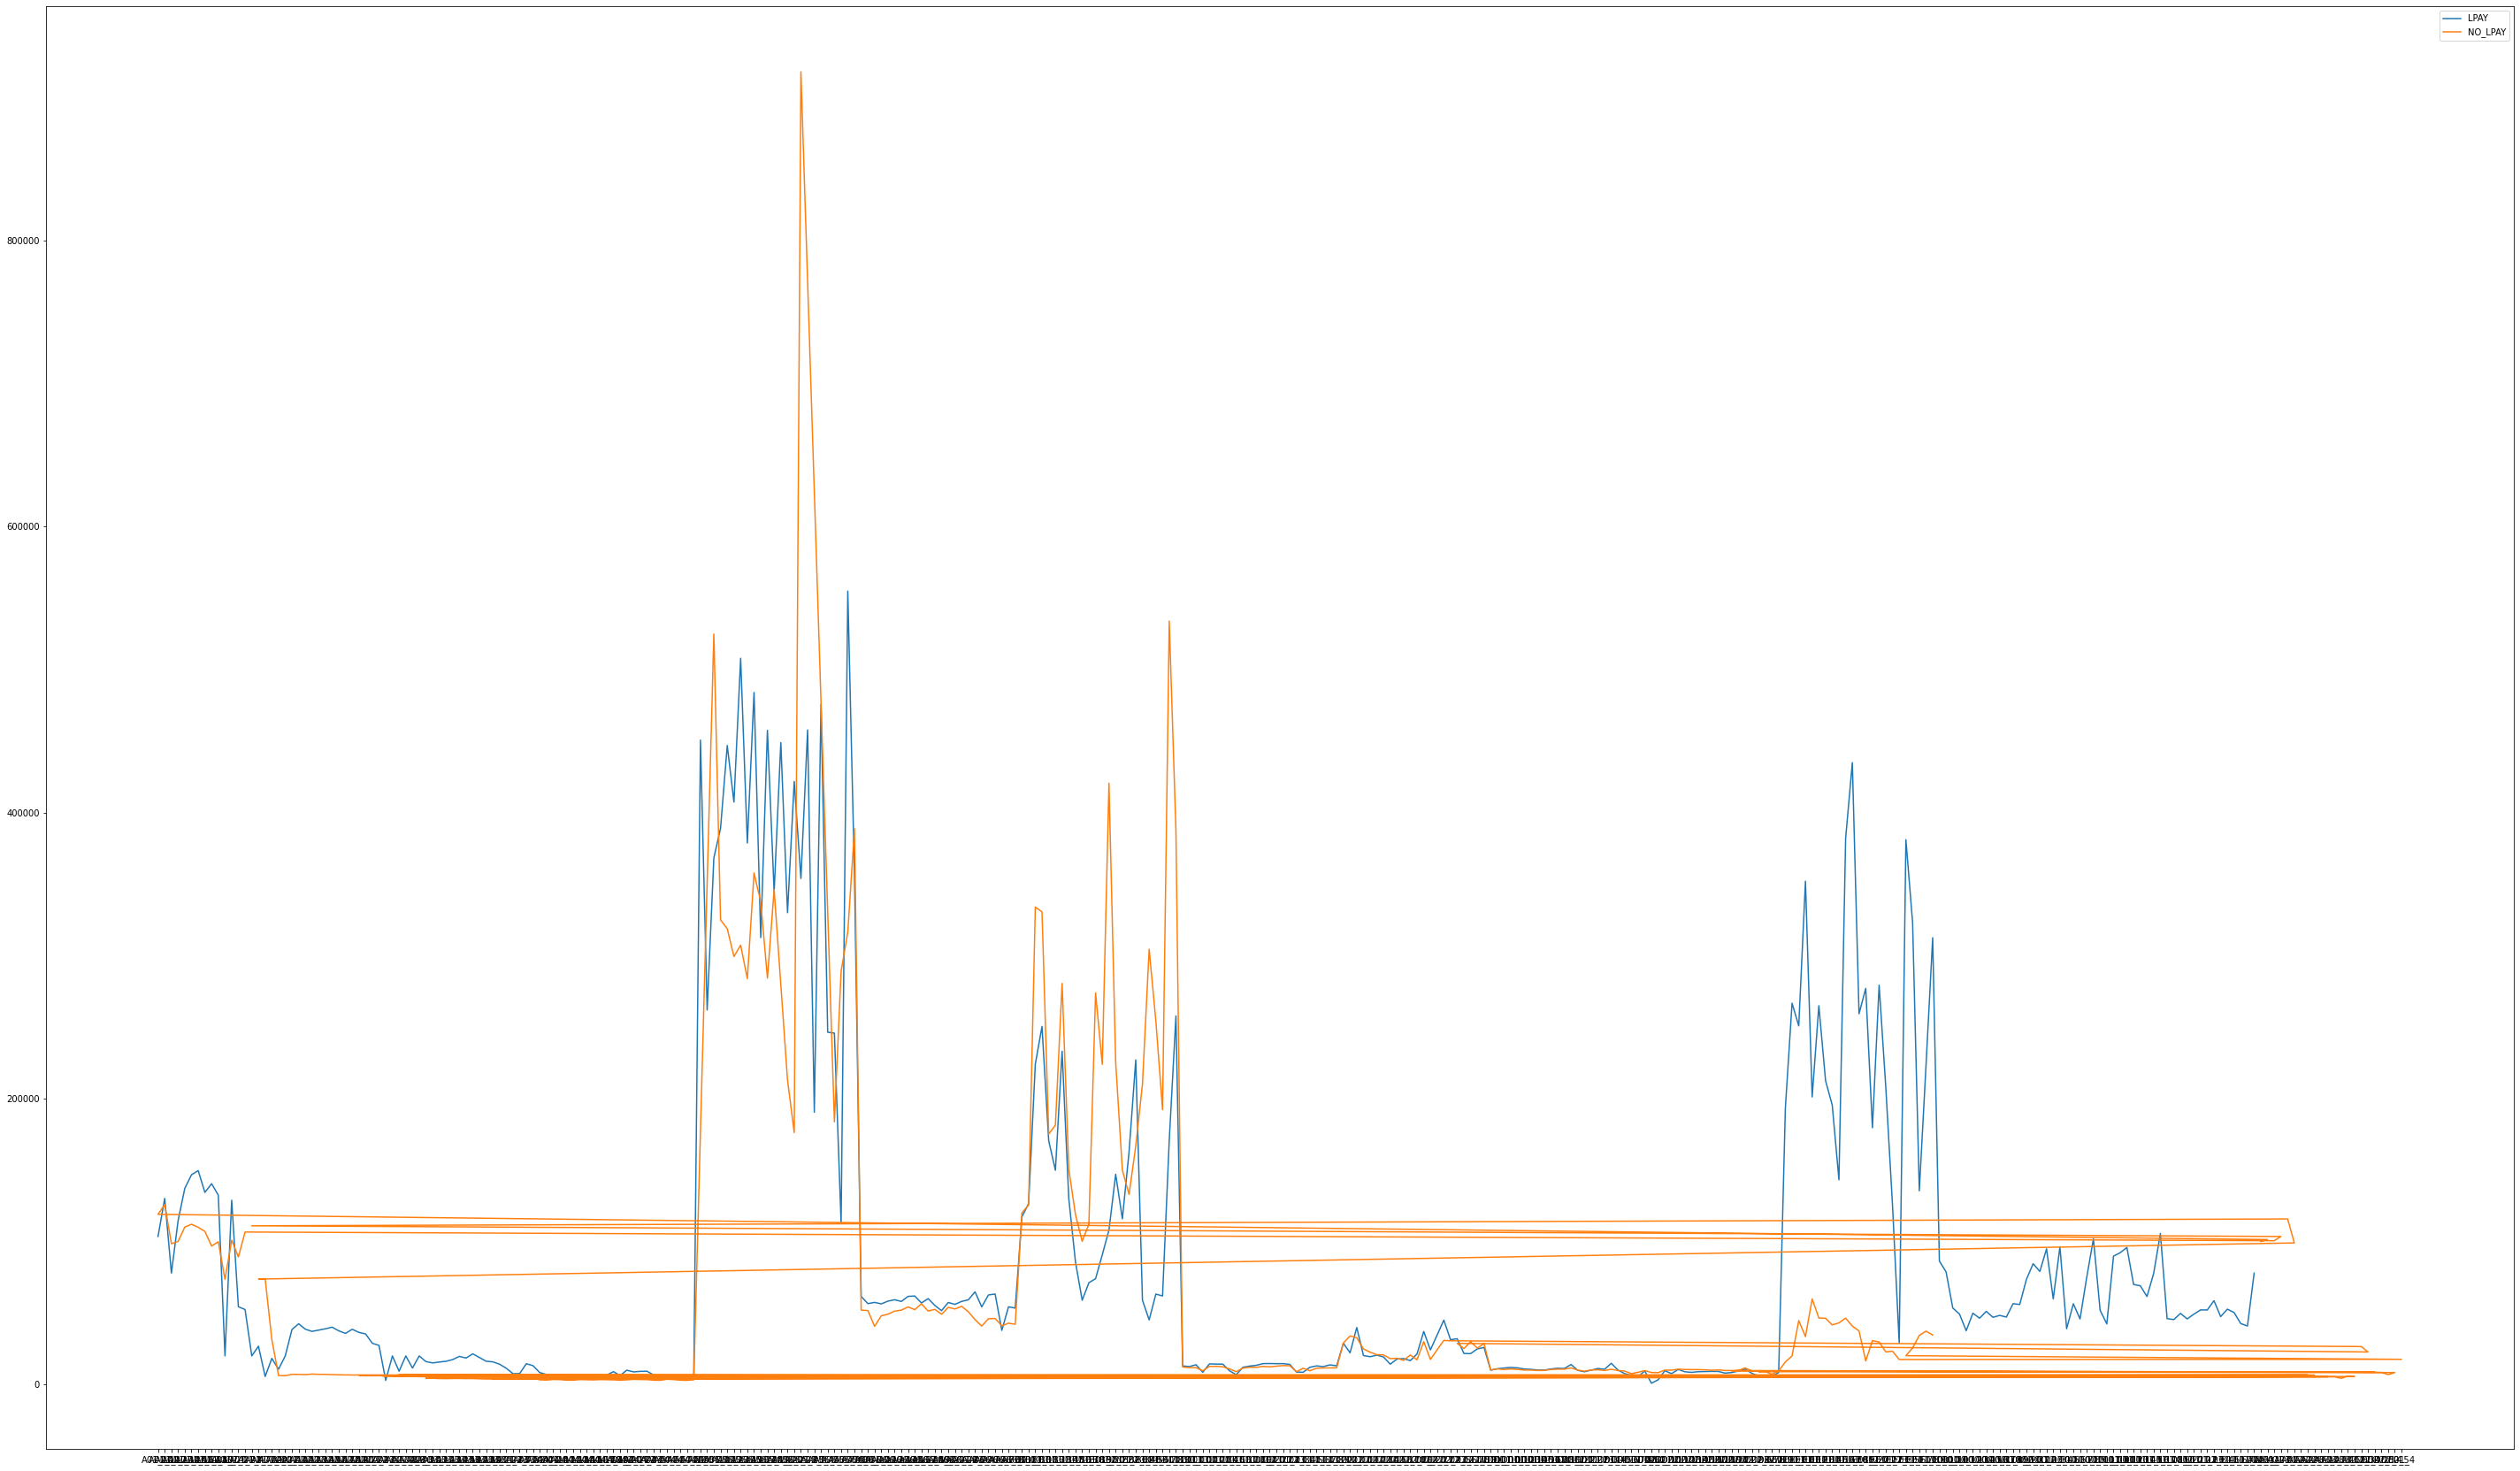

In [ ]:
makeColumns(['cop_c', 'de_hr'])

plt.figure(figsize=(50,30))
makeGraph('cop_c_de_hr')

In [ ]:
LPAY.groupby('cop_c_de_hr').mean()['buy_am']

cop_c_de_hr
A01_10    103523.023758
A01_11    130137.723243
A01_12     77921.275377
A01_13    114651.668143
A01_14    137171.862555
              ...      
L01_5      52694.914179
L01_6      50373.319742
L01_7      42615.230081
L01_8      40911.900325
L01_9      77880.878991
Name: buy_am, Length: 314, dtype: float64

In [ ]:
NO_LPAY.groupby('cop_c_de_hr').mean()['buy_am']

cop_c_de_hr
A01_0     100043.826367
A01_1     101389.090909
A01_10    119012.252736
A01_11    125888.721783
A01_12     98474.369221
              ...      
E01_5      20160.268293
E01_6      25563.750000
E01_7      34339.676923
E01_8      37318.044643
E01_9      34606.408163
Name: buy_am, Length: 281, dtype: float64

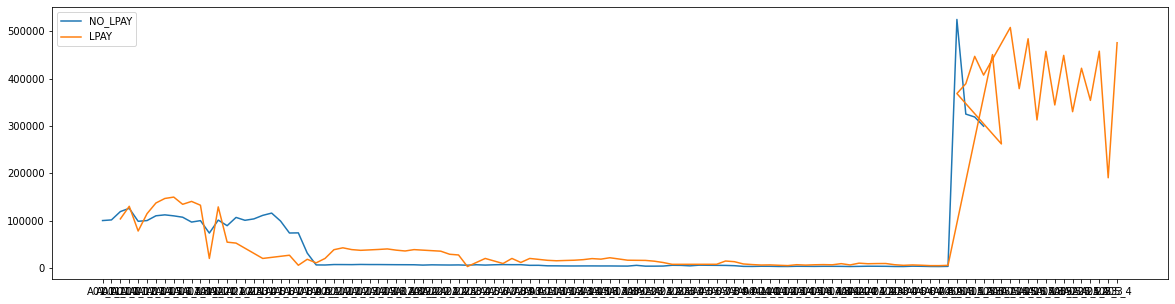

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(NO_LPAY.groupby('cop_c_de_hr').mean()['buy_am'][:100], label='NO_LPAY')
plt.plot(LPAY.groupby('cop_c_de_hr').mean()['buy_am'][:100], label='LPAY')
plt.legend()

특정한 상황에서 LPAY로만 구매하는 경향이 나타남

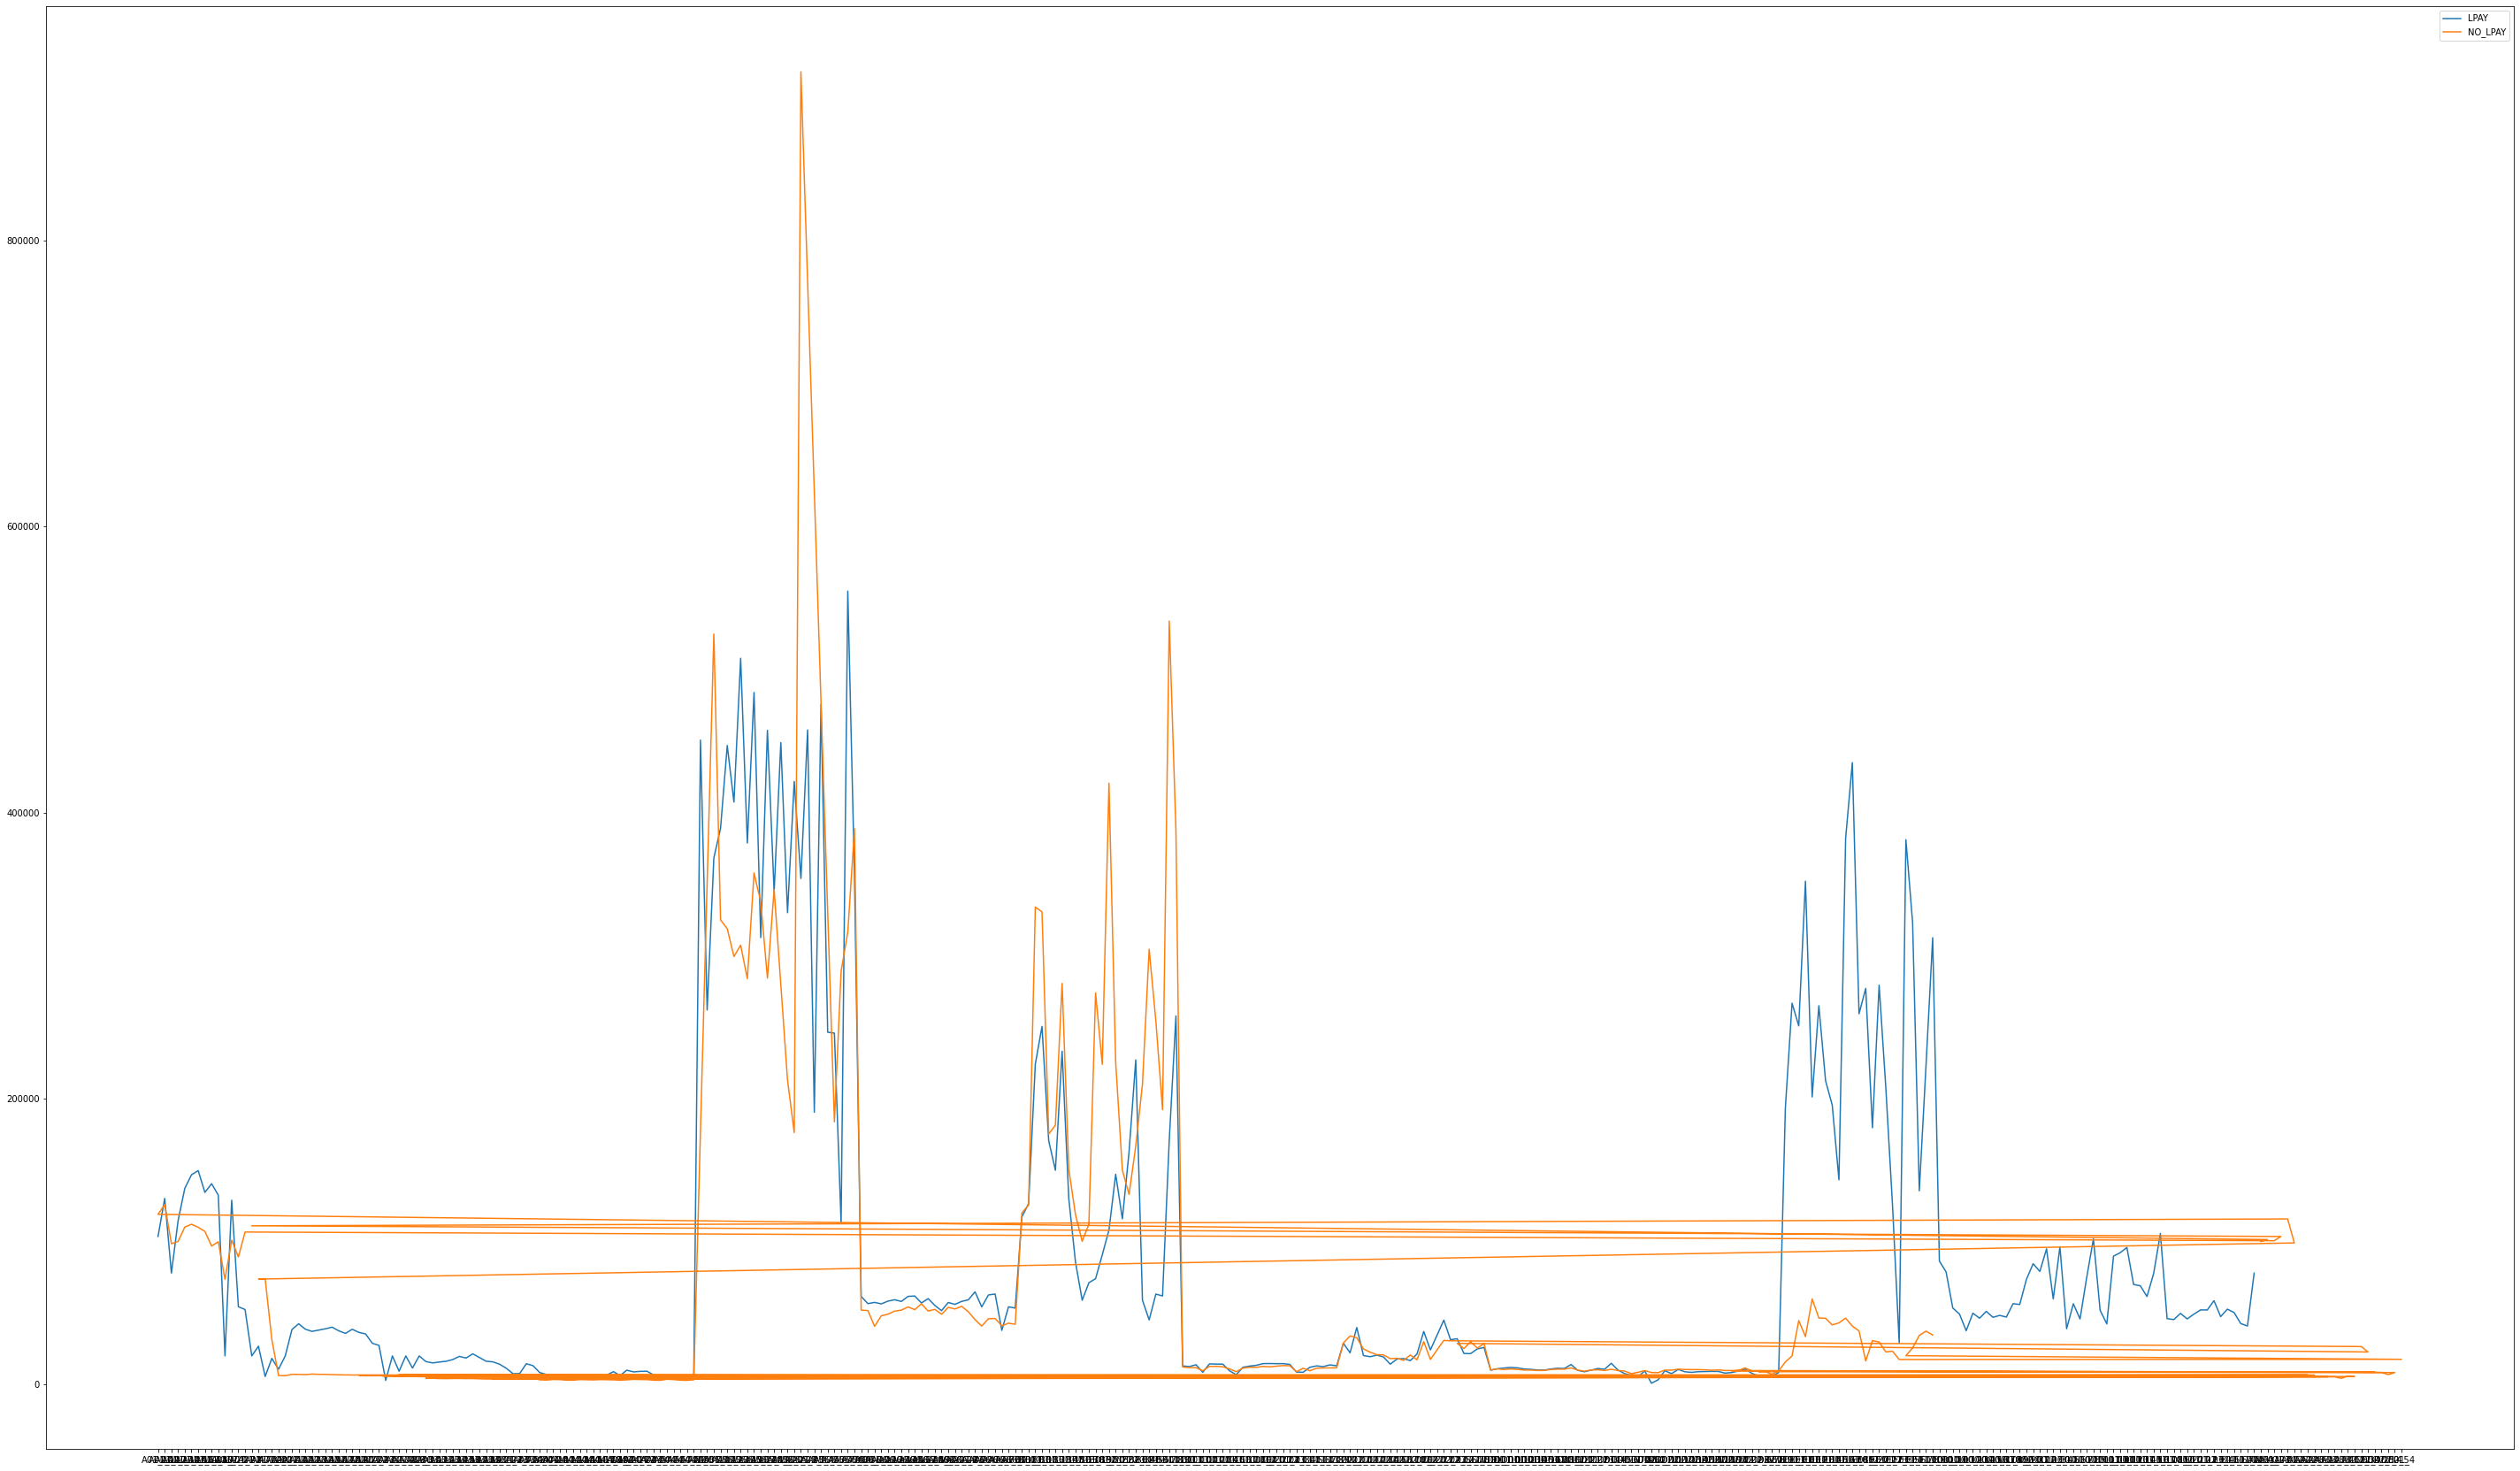

In [ ]:
makeColumns(['de_hr', 'de_dt'])

plt.figure(figsize=(50,30))
makeGraph('de_hr_de_dt')